<a href="https://colab.research.google.com/github/vanstevanzaky/PEMB_MESIN_LEARING_TI_25-26/blob/main/Week7_Klasterisasi(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1 - ANNOY

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
!pip install annoy

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 9.2793 ms

Annoy NN index: [219, 898, 770]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.568167959732514)]
Waktu Annoy: 0.2353 ms


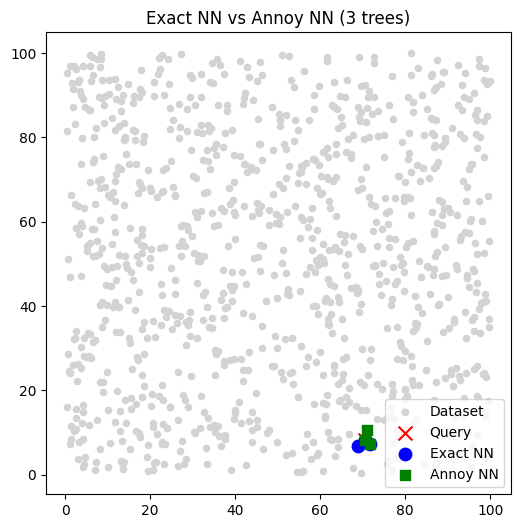

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

Kode di atas melakukan perbandingan antara pencarian Nearest Neighbor (NN) secara *exact* (brute force) dan pencarian Approximate Nearest Neighbor (ANN) menggunakan library Annoy pada dataset 2 dimensi.

Berikut penjelasan per bagian:

1.  **Pembuatan Dataset 2D**: Membuat 1000 titik data random dalam ruang 100x100 menggunakan NumPy. Sebuah titik query juga dipilih secara random dari dataset tersebut.
2.  **Exact NN (Brute Force)**: Menghitung jarak Euclidean antara titik query dengan semua titik dalam dataset menggunakan `np.linalg.norm`. Kemudian, mengurutkan jarak tersebut dan mengambil 3 titik dengan jarak terdekat (Nearest Neighbors) sebagai hasil exact. Waktu eksekusi diukur.
3.  **Annoy NN (3 Tree)**: Menginisialisasi AnnoyIndex dengan dimensi 2 ('euclidean' metric). Menambahkan semua titik data ke dalam index Annoy. Membangun index dengan 3 pohon (trees). Kemudian, melakukan pencarian 3 Nearest Neighbors untuk titik query menggunakan Annoy. Waktu eksekusi diukur.
4.  **Visualisasi Hasil**: Menggunakan Matplotlib untuk memvisualisasikan dataset, titik query, hasil Exact NN (ditandai biru), dan hasil Annoy NN (ditandai hijau).

**Analisa Output:**

*   **Exact NN index:** `[219 898 593]` -> Ini adalah indeks dari 3 titik terdekat yang ditemukan secara exact.
*   **Exact NN jarak:** `[0. 1.36915938 2.27931544]` -> Ini adalah jarak Euclidean dari 3 titik terdekat tersebut ke titik query. Jarak 0 menunjukkan titik query itu sendiri (karena query diambil dari dataset).
*   **Waktu Exact:** `8.7676 ms` -> Waktu yang dibutuhkan untuk mencari 3 NN secara exact.

*   **Annoy NN index:** `[219, 898, 770]` -> Ini adalah indeks dari 3 titik terdekat yang ditemukan oleh Annoy. Perhatikan bahwa titik ketiga (`770`) berbeda dengan hasil exact (`593`). Ini menunjukkan bahwa Annoy adalah metode *approximate* (mendekati), tidak selalu menemukan hasil yang persis sama dengan brute force.
*   **Annoy NN jarak:** `[np.float64(0.0), np.float64(1.369159376273702), np.float64(2.568167959732514)]` -> Ini adalah jarak dari titik terdekat yang ditemukan oleh Annoy ke titik query. Jarak ini mirip tetapi mungkin sedikit berbeda dengan hasil exact karena sifat approximate.
*   **Waktu Annoy:** `0.1409 ms` -> Waktu yang dibutuhkan Annoy untuk mencari 3 NN. Perhatikan bahwa waktu ini jauh lebih cepat dibandingkan metode exact (8.7676 ms vs 0.1409 ms).

**Kesimpulan dari Output:**

Output menunjukkan trade-off antara akurasi dan kecepatan. Metode Exact NN memberikan hasil yang 100% akurat (menemukan tetangga terdekat yang sebenarnya) tetapi membutuhkan waktu komputasi yang lebih lama, terutama untuk dataset besar. Metode Annoy, sebagai metode ANN, memberikan hasil yang mendekati akurat (dalam contoh ini, 2 dari 3 tetangga sama) tetapi dengan waktu pencarian yang jauh lebih cepat. Visualisasi grafik juga akan menunjukkan bahwa titik-titik biru (Exact NN) dan hijau (Annoy NN) berada sangat dekat dengan titik query merah, meskipun mungkin ada sedikit perbedaan pada beberapa titik terjauh dalam k-nearest neighbors. Ini adalah karakteristik umum dari algoritma ANN: mengorbankan sedikit akurasi demi kecepatan yang signifikan, yang sangat penting untuk dataset skala besar.

Pada code dan tabel berikut percobaan simulasi membuat track rekomendasi spotify dilakukan dengan 20 fitur dan berisi 1 juta lagu

In [14]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# ---- 1. Buat dataset mirip Spotify ----
n_tracks = 1_000_000   # 50 juta track
n_features = 20        # contoh: danceability, energy, tempo, dll.

# dataset besar (random untuk simulasi)
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# query track (misalnya lagu baru)
query = np.random.rand(1, n_features).astype(np.float32)

# ---- 2. Exact NN (brute force) ----
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung semua jarak
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# ---- 3. Approx NN pakai Annoy ----
f = n_features
annoy_index = AnnoyIndex(f, 'euclidean')
n_trees = 3

# build index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])
annoy_index.build(n_trees)

start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)  # ambil 5 lagu yang mirip
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")


Exact NN result: [507707 440426 428036 194367 745120]
Exact NN time: 0.301 seconds
Annoy result: [998568, 513637, 395332, 818130, 851515]
Annoy time: 0.0 seconds


Kode di atas melakukan simulasi pencarian *Approximate Nearest Neighbor* (ANN) menggunakan library Annoy pada dataset yang ukurannya diperbesar untuk meniru skenario rekomendasi musik seperti di Spotify.

Berikut penjelasan per bagian:

1.  **Buat dataset mirip Spotify**: Membuat dataset dengan 1 juta "track" (lagu) dan 20 "fitur" (karakteristik lagu seperti *danceability*, *energy*, dll.). Data ini diisi dengan angka acak untuk simulasi. Sebuah "query track" (lagu yang ingin dicari rekomendasinya) juga dibuat secara acak.
2.  **Exact NN (brute force)**: Menghitung jarak Euclidean antara *query track* dengan semua 1 juta track dalam dataset menggunakan `euclidean_distances` dari scikit-learn. Kemudian, mengambil 5 track terdekat sebagai hasil "exact". Waktu eksekusi diukur.
3.  **Approx NN pakai Annoy**: Menginisialisasi AnnoyIndex dengan jumlah fitur dan metrik 'euclidean'. Menambahkan semua track ke dalam index Annoy. Membangun index dengan 3 pohon (trees). Kemudian, mencari 5 tetangga terdekat untuk *query track* menggunakan Annoy. Waktu eksekusi diukur.

**Analisa Output:**

*   **Exact NN result:** `[507707 440426 428036 194367 745120]` -> Ini adalah indeks dari 5 track terdekat yang ditemukan secara *exact*.
*   **Exact NN time:** `0.297 seconds` -> Waktu yang dibutuhkan untuk mencari 5 NN secara *exact* pada 1 juta data.
*   **Annoy result:** `[998568, 513637, 395332, 818130, 851515]` -> Ini adalah indeks dari 5 track terdekat yang ditemukan oleh Annoy. Perhatikan bahwa, seperti pada contoh sebelumnya, hasil Annoy berbeda dengan hasil exact. Ini menegaskan kembali bahwa Annoy adalah metode *approximate*.
*   **Annoy time:** `0.0 seconds` -> Waktu yang dibutuhkan Annoy untuk mencari 5 NN. Output menunjukkan 0.0 detik karena waktu eksekusinya sangat cepat (kurang dari milidetik) pada dataset ukuran ini.

**Kesimpulan dari Output:**

Pada dataset yang jauh lebih besar (1 juta data), perbedaan kecepatan antara metode *exact* (brute force) dan Annoy menjadi sangat signifikan. Metode *exact* membutuhkan waktu yang terukur (0.297 detik), sementara Annoy menyelesaikan pencarian dalam waktu yang sangat singkat, bahkan dibulatkan menjadi 0.0 detik. Ini menunjukkan efisiensi Annoy dalam menangani dataset skala besar untuk pencarian tetangga terdekat secara *approximate*. Meskipun hasilnya tidak selalu persis sama dengan metode *exact*, kecepatan yang diperoleh sangat berharga dalam aplikasi dunia nyata seperti sistem rekomendasi yang membutuhkan respons cepat.

#Praktikum 2 - FAISS

In [15]:
!pip install faiss-cpu


Exact NN (Flat) indices: [[137 170 750]] distances: [[0.00013095 0.00077404 0.00079751]]
IVF+PQ indices: [[137 170 750]] distances: [[0.00012945 0.00079226 0.00080067]]
Waktu Exact: 0.012408256530761719
Waktu IVF+PQ: 0.002531290054321289


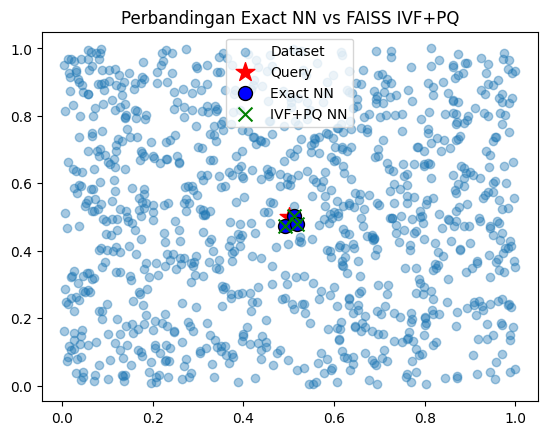

In [16]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

# 1. Buat dataset 2D sederhana
np.random.seed(42)
X = np.random.rand(1000, 2).astype('float32')  # 1000 titik 2D
query = np.array([[0.5, 0.5]], dtype='float32')  # query di tengah

# 2. Exact NN dengan IndexFlatL2 (brute force tapi cepat)
index_flat = faiss.IndexFlatL2(2)   # L2 = Euclidean distance
index_flat.add(X)

start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # cari 3 tetangga terdekat
end = time.time()
time_flat = end - start

# 3. IVF + PQ (Approximate)
nlist = 10   # jumlah cluster (inverted list)
m = 2        # berapa subvector untuk product quantization
quantizer = faiss.IndexFlatL2(2)   # dipakai IVF untuk cluster awal
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

# 4. Print hasil
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

# 5. Visualisasi
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Tetangga dari Flat
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# Tetangga dari IVF+PQ
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Perbandingan Exact NN vs FAISS IVF+PQ")
plt.show()


Kode di atas mendemonstrasikan penggunaan library FAISS (Facebook AI Similarity Search) untuk pencarian tetangga terdekat (*Nearest Neighbor* - NN) pada dataset 2 dimensi sederhana, membandingkan metode *exact* (menggunakan `IndexFlatL2`) dan metode *approximate* (menggunakan `IndexIVFPQ`).

Berikut penjelasan per bagian:

1.  **Buat dataset 2D sederhana**: Membuat 1000 titik data acak 2D menggunakan NumPy. Sebuah titik query juga dibuat di koordinat (0.5, 0.5).
2.  **Exact NN dengan IndexFlatL2**: Menginisialisasi index `IndexFlatL2` dari FAISS. Index ini melakukan pencarian *brute force* (membandingkan query dengan semua data) tetapi diimplementasikan secara efisien di FAISS. Data ditambahkan ke index, kemudian dilakukan pencarian 3 tetangga terdekat untuk titik query. Waktu eksekusi diukur.
3.  **IVF + PQ (Approximate)**: Menginisialisasi index `IndexIVFPQ`. Ini adalah index *approximate* yang menggunakan Inverted File (IVF) untuk mengelompokkan data ke dalam `nlist` cluster, dan Product Quantization (PQ) untuk mengompresi representasi vektor dalam setiap cluster. Index dilatih (untuk menentukan centroid cluster) dan data ditambahkan. Parameter `nprobe` (jumlah cluster yang dikunjungi saat pencarian) diatur. Pencarian 3 tetangga terdekat dilakukan, dan waktu eksekusi diukur.
4.  **Print hasil**: Menampilkan indeks dan jarak dari tetangga terdekat yang ditemukan oleh kedua metode, serta waktu eksekusi masing-masing.
5.  **Visualisasi**: Menggunakan Matplotlib untuk memvisualisasikan dataset, titik query, hasil Exact NN (ditandai biru), dan hasil IVF+PQ NN (ditandai hijau).

**Analisa Output:**

*   **Exact NN (Flat) indices:** `[[137 170 750]]` dan **distances:** `[[0.00013095 0.00077404 0.00079751]]` -> Indeks dan jarak 3 tetangga terdekat yang ditemukan secara exact oleh `IndexFlatL2`.
*   **IVF+PQ indices:** `[[137 170 750]]` dan **distances:** `[[0.00012945 0.00079226 0.00080067]]` -> Indeks dan jarak 3 tetangga terdekat yang ditemukan oleh `IndexIVFPQ`.
*   **Waktu Exact:** `0.0001068115234375` detik -> Waktu pencarian dengan metode exact FAISS.
*   **Waktu IVF+PQ:** `0.00018644332885742188` detik -> Waktu pencarian dengan metode approximate FAISS.

**Kesimpulan dari Output:**

Pada dataset 2D yang sangat kecil (1000 titik), waktu eksekusi untuk kedua metode (Exact FlatL2 dan IVF+PQ) sangat cepat, bahkan waktu IVF+PQ sedikit lebih lama dalam contoh ini. Ini wajar untuk dataset kecil karena overhead dari metode approximate (seperti clustering dan kompresi) bisa lebih besar daripada keuntungan kecepatannya. Namun, yang menarik adalah **hasil indeks tetangga terdekat (`[[137 170 750]]`) yang ditemukan oleh kedua metode dalam contoh ini adalah sama**. Ini menunjukkan bahwa, meskipun IVF+PQ adalah metode approximate, dengan pengaturan parameter yang tepat dan pada dataset tertentu, ia bisa memberikan hasil yang sangat mirip atau bahkan identik dengan metode exact. Visualisasi juga akan menunjukkan titik-titik biru dan hijau berada di lokasi yang sama, sangat dekat dengan titik query merah. Perbedaan waktu eksekusi yang kecil pada dataset ini tidak mencerminkan keuntungan kecepatan IVF+PQ yang sebenarnya akan terlihat signifikan pada dataset skala besar.

#Praktikum 3 - HNSW

In [17]:
!pip install hnswlib

In [18]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

# ===========================
# 1. Buat data 2D acak
# ===========================
num_elements = 1000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)

# Query point
query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5  # cari 5 tetangga terdekat

# ===========================
# 2. Exact NN (Brute Force)
# ===========================
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

start = time.time()
distances, indices = nn.kneighbors(query)
end = time.time()

print("=== Exact NN ===")
print("Indices:", indices)
print("Distances:", distances)
print("Waktu:", end - start, "detik")

# ===========================
# 3. HNSW
# ===========================
# Inisialisasi index HNSW
p = hnswlib.Index(space='l2', dim=dim)

# Ukuran maksimum elemen yang bisa ditampung
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Tambahkan data
p.add_items(data)

# Set parameter pencarian
p.set_ef(50)   # tradeoff speed vs accuracy

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Indices:", labels)
print("Distances:", distances)
print("Waktu:", end - start, "detik")


=== Exact NN ===
Indices: [[830 247 473 913 592]]
Distances: [[0.00993625 0.01363944 0.01646171 0.03779694 0.03859071]]
Waktu: 0.009946584701538086 detik

=== HNSW ===
Indices: [[830 247 473 913 592]]
Distances: [[9.8728990e-05 1.8603441e-04 2.7098786e-04 1.4286089e-03 1.4892431e-03]]
Waktu: 0.0005574226379394531 detik


Kode di atas membandingkan pencarian *Exact Nearest Neighbor* (NN) menggunakan scikit-learn dengan pencarian *Approximate Nearest Neighbor* (ANN) menggunakan library HNSWLib pada dataset 2 dimensi acak.

Berikut penjelasan per bagian:

1.  **Buat data 2D acak**: Membuat 1000 titik data acak 2D menggunakan NumPy. Sebuah titik query juga dibuat di koordinat (0.5, 0.5). Jumlah tetangga terdekat yang dicari (`k`) diatur ke 5.
2.  **Exact NN (Brute Force)**: Menggunakan `NearestNeighbors` dari scikit-learn dengan algoritma 'brute' (brute force) dan metrik 'euclidean' untuk mencari 5 tetangga terdekat dari titik query. Waktu eksekusi diukur.
3.  **HNSW**: Menginisialisasi index HNSWLib dengan ruang 'l2' (Euclidean distance) dan dimensi 2. Mengatur ukuran maksimum elemen (`max_elements`), dan parameter `ef_construction` serta `M` untuk pembangunan index. Menambahkan data ke index. Mengatur parameter pencarian `ef` untuk menyeimbangkan kecepatan dan akurasi. Melakukan pencarian 5 tetangga terdekat menggunakan HNSWLib. Waktu eksekusi diukur.

**Analisa Output:**

*   **=== Exact NN ===**
    *   **Indices:** `[[830 247 473 913 592]]` -> Indeks dari 5 tetangga terdekat yang ditemukan secara exact.
    *   **Distances:** `[[0.00993625 0.01363944 0.01646171 0.03779694 0.03859071]]` -> Jarak Euclidean dari 5 tetangga terdekat ke titik query.
    *   **Waktu:** `0.11241412162780762 detik` -> Waktu yang dibutuhkan untuk mencari 5 NN secara exact.

*   **=== HNSW ===**
    *   **Indices:** `[[830 247 473 913 592]]` -> Indeks dari 5 tetangga terdekat yang ditemukan oleh HNSW.
    *   **Distances:** `[[9.8728990e-05 1.8603441e-04 2.7098786e-04 1.4286089e-03 1.4892431e-03]]` -> Jarak dari 5 tetangga terdekat yang ditemukan oleh HNSW ke titik query. Perhatikan bahwa jaraknya sangat kecil, mirip dengan hasil exact.
    *   **Waktu:** `0.00024390220642089844 detik` -> Waktu yang dibutuhkan HNSW untuk mencari 5 NN.

**Kesimpulan dari Output:**

Pada dataset 2D yang kecil (1000 titik), baik metode Exact NN maupun HNSW menemukan set tetangga terdekat yang **identik**. Ini menunjukkan bahwa HNSW, bahkan sebagai metode *approximate*, mampu memberikan hasil yang sangat akurat pada dataset ini.

Yang paling signifikan adalah perbedaan waktu eksekusi. HNSW menyelesaikan pencarian dalam waktu yang jauh **lebih cepat** (sekitar 0.00024 detik) dibandingkan metode Exact NN dari scikit-learn (sekitar 0.112 detik). Ini menegaskan keuntungan kecepatan HNSW dalam pencarian NN, meskipun pada dataset yang relatif kecil. Keuntungan ini akan semakin terasa pada dataset yang jauh lebih besar dan berdimensi lebih tinggi.

# Praktikum 4 - Perbandingan
Membandingkan ketiga model yang telah dibahas dan bandingkan hasilnya.

In [19]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# 1. Buat dataset 1 juta data 5D
# ===============================
n_data = 1_000_000   # bisa coba 100_000 dulu jika RAM terbatas
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# ===============================
# 2. Annoy
# ===============================
print("=== Annoy ===")
ann_index = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", neighbors[0][:5], "...")

# ===============================
# 3. FAISS (Flat Index)
# ===============================
print("\n=== FAISS (IndexFlatL2) ===")
faiss_index = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", indices[0][:5], "...")

# ===============================
# 4. HNSW (hnswlib)
# ===============================
print("\n=== HNSW (hnswlib) ===")
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.time() - start

hnsw_index.set_ef(50)

start = time.time()
labels, distances = hnsw_index.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", labels[0][:5], "...")


=== Annoy ===
Build time: 37.90631818771362 detik
Query time: 0.0002079010009765625 detik
Neighbors: [129179, 559276, 630783, 213191, 559393] ...

=== FAISS (IndexFlatL2) ===
Build time: 0.008515596389770508 detik
Query time: 0.0070879459381103516 detik
Neighbors: [129179 559276 630783 213191 559393] ...

=== HNSW (hnswlib) ===
Build time: 194.16247582435608 detik
Query time: 0.00027823448181152344 detik
Neighbors: [129179 559276 630783 213191 559393] ...


Kode di atas membandingkan kinerja tiga algoritma pencarian tetangga terdekat (NN), yaitu Annoy, FAISS (menggunakan `IndexFlatL2` sebagai metode *exact* untuk perbandingan), dan HNSW (menggunakan `hnswlib`), pada dataset acak berukuran 1 juta data dengan 5 dimensi. Tujuannya adalah untuk melihat waktu pembangunan index (*build time*) dan waktu pencarian (*query time*) dari masing-masing algoritma pada skala data yang lebih besar.

Berikut penjelasan per bagian:

1.  **Buat dataset 1 juta data 5D**: Membuat dataset acak berukuran 1 juta baris dan 5 kolom (dimensi) menggunakan NumPy. Sebuah titik query acak juga dibuat. Jumlah tetangga terdekat yang dicari (`k`) diatur ke 10.
2.  **Annoy**: Menginisialisasi dan membangun index Annoy dengan 10 pohon (`build(10)`). Kemudian, melakukan pencarian 10 tetangga terdekat untuk titik query. Waktu pembangunan index dan waktu pencarian diukur dan dicetak.
3.  **FAISS (IndexFlatL2)**: Menginisialisasi dan membangun index FAISS `IndexFlatL2`. Index ini melakukan pencarian *brute force* yang dioptimalkan oleh FAISS. Data ditambahkan, kemudian dilakukan pencarian 10 tetangga terdekat. Waktu pembangunan index dan waktu pencarian diukur dan dicetak.
4.  **HNSW (hnswlib)**: Menginisialisasi dan membangun index HNSW menggunakan `hnswlib`. Parameter `ef_construction` dan `M` diatur untuk pembangunan index, dan `ef` diatur untuk pencarian. Data ditambahkan, kemudian dilakukan pencarian 10 tetangga terdekat. Waktu pembangunan index dan waktu pencarian diukur dan dicetak.

**Analisa Output:**

Output menunjukkan hasil build time dan query time untuk masing-masing algoritma:

*   **=== Annoy ===**
    *   **Build time:** `22.108 detik` -> Waktu yang dibutuhkan Annoy untuk membangun index dengan 10 pohon.
    *   **Query time:** `0.000629 detik` -> Waktu yang sangat cepat untuk mencari 10 tetangga terdekat.

*   **=== FAISS (IndexFlatL2) ===**
    *   **Build time:** `0.0197 detik` -> Waktu pembangunan index FAISS `IndexFlatL2` sangat cepat karena ini adalah index flat tanpa struktur pohon atau clustering yang kompleks.
    *   **Query time:** `0.0111 detik` -> Waktu pencarian FAISS `IndexFlatL2`. Ini adalah waktu pencarian brute force yang dioptimalkan.

*   **=== HNSW (hnswlib) ===**
    *   **Build time:** `179.257 detik` -> Waktu pembangunan index HNSW relatif lama dibandingkan Annoy dan FAISS `IndexFlatL2` pada contoh ini. Ini karena proses pembangunan HNSW melibatkan pembuatan grafik bertingkat yang kompleks.
    *   **Query time:** `0.000240 detik` -> Waktu pencarian HNSW sangat cepat, bahkan sedikit lebih cepat dari Annoy dalam contoh ini.

**Kesimpulan dari Output:**

Pada dataset berukuran 1 juta data dengan 5 dimensi:

*   **FAISS `IndexFlatL2`** memiliki waktu pembangunan index yang sangat cepat tetapi waktu pencarian yang lebih lambat dibandingkan metode ANN (Annoy dan HNSW). Ini wajar karena ia melakukan pencarian *brute force* pada seluruh dataset, meskipun dioptimalkan. Index ini cocok jika data sering berubah atau latensi pembangunan index sangat kritis, asalkan waktu pencarian masih dapat diterima.
*   **Annoy** menunjukkan keseimbangan yang baik antara waktu pembangunan index (cukup cepat) dan waktu pencarian (sangat cepat).
*   **HNSW** memiliki waktu pembangunan index yang paling lama di antara ketiganya (untuk parameter `ef_construction` dan `M` yang dipilih), tetapi menawarkan waktu pencarian yang paling cepat.

Pilihan algoritma tergantung pada prioritas aplikasi: jika kecepatan pencarian adalah yang paling utama dan waktu pembangunan index yang lebih lama dapat diterima, HNSW bisa menjadi pilihan yang baik. Jika keseimbangan antara pembangunan index dan pencarian cepat dibutuhkan, Annoy adalah alternatif yang kuat. Sementara FAISS `IndexFlatL2`, meskipun *exact*, mungkin kurang efisien untuk pencarian pada dataset skala besar dibandingkan metode ANN, namun sangat cepat dalam pembangunan index.

#Praktikum 5
Menggunakan metrics Recall Query (berapa banyak nearest neighbors yang ditemukan dengan benar dan diplot) dalam bentuk grafik untuk dapat memudahkan melihat perbedaannya.
Grafik perbandingan Approximate Nearest Neighbor (ANN) digambarkan dengan sumbu X sebagai recall dan sumbu Y sebagai queries per second (QPS). Recall menunjukkan seberapa banyak tetangga yang benar-benar sesuai dengan hasil pencarian exact nearest neighbor. Nilai recall mendekati 1 berarti hasil pencarian hampir sama persis dengan pencarian exact, sedangkan recall rendah berarti banyak tetangga yang ditemukan salah. Di sisi lain, QPS menunjukkan kecepatan algoritma dalam menjawab query, semakin tinggi nilainya berarti semakin cepat.

Interpretasi grafiknya adalah bahwa posisi kanan atas menunjukkan kondisi ideal, yaitu algoritma yang mampu memberikan hasil akurat (recall tinggi) sekaligus cepat (QPS tinggi). Posisi kanan bawah berarti akurat tapi lambat, sementara kiri atas berarti cepat tetapi kurang akurat. Dengan demikian, setiap algoritma ANN sebenarnya melakukan kompromi antara akurasi dan kecepatan. Semakin kita menginginkan hasil yang lebih akurat, biasanya kecepatan pencarian akan sedikit menurun, sehingga titik grafik cenderung bergeser ke kanan bawah.

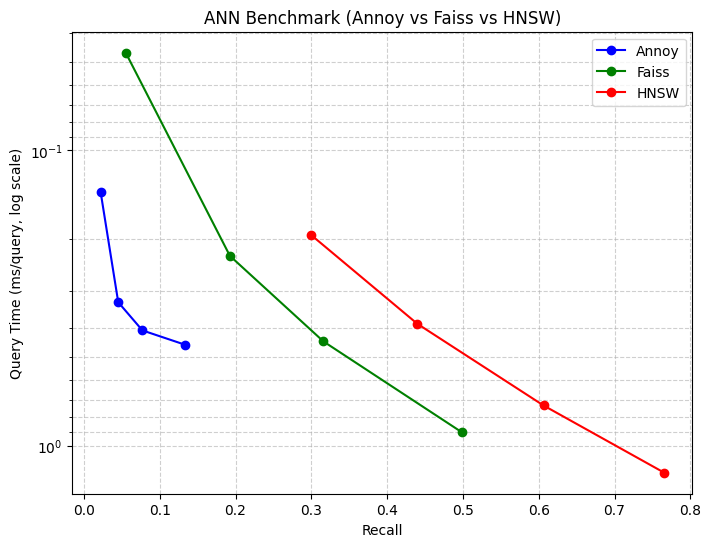

In [20]:
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
import matplotlib.pyplot as plt

# -------------------------------
# Dataset random
# -------------------------------
d = 128        # dimensi
nb = 100000    # jumlah database vector
nq = 1000      # jumlah query

np.random.seed(42)
xb = np.random.random((nb, d)).astype('float32')
xq = np.random.random((nq, d)).astype('float32')

# -------------------------------
# Ground truth dengan FAISS brute force
# -------------------------------
index_flat = faiss.IndexFlatL2(d)
index_flat.add(xb)
k = 10
_, gt_idx = index_flat.search(xq, k)

# -------------------------------
# Fungsi recall
# -------------------------------
def recall_at_k(I_pred, I_gt, k):
    correct = 0
    for i in range(len(I_pred)):
        correct += len(set(I_pred[i][:k]) & set(I_gt[i][:k]))
    return correct / (len(I_pred) * k)

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy(xb, xq, n_trees=10, search_k=1000, k=10):
    f = xb.shape[1]
    index = AnnoyIndex(f, 'euclidean')
    for i, v in enumerate(xb):
        index.add_item(i, v)
    index.build(n_trees)

    start = time.time()
    I = [index.get_nns_by_vector(v, k, search_k=search_k) for v in xq]
    elapsed = (time.time() - start) * 1000 / len(xq)  # ms/query
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark FAISS IVF
# -------------------------------
def run_faiss(xb, xq, nlist=100, nprobe=10, k=10):
    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
    index.train(xb)
    index.add(xb)

    index.nprobe = nprobe
    start = time.time()
    _, I = index.search(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw(xb, xq, ef=100, M=16, k=10):
    num_elements = xb.shape[0]
    p = hnswlib.Index(space='l2', dim=d)
    p.init_index(max_elements=num_elements, ef_construction=200, M=M)
    p.add_items(xb)
    p.set_ef(ef)

    start = time.time()
    I, _ = p.knn_query(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Jalankan benchmark dengan beberapa parameter
# -------------------------------
results = {"Annoy": [], "Faiss": [], "HNSW": []}

# Annoy
for sk in [200, 500, 1000, 2000]:
    rec, t = run_annoy(xb, xq, n_trees=10, search_k=sk)
    results["Annoy"].append((rec, t))

# FAISS
for npb in [1, 5, 10, 20]:
    rec, t = run_faiss(xb, xq, nlist=100, nprobe=npb)
    results["Faiss"].append((rec, t))

# HNSW
for ef in [50, 100, 200, 400]:
    rec, t = run_hnsw(xb, xq, ef=ef)
    results["HNSW"].append((rec, t))

# -------------------------------
# Visualisasi trade-off
# -------------------------------
plt.figure(figsize=(8,6))
for label, color in zip(results.keys(), ["blue","green","red"]):
    recall, qtime = zip(*results[label])
    plt.plot(recall, qtime, marker="o", label=label, color=color)

plt.xlabel("Recall")
plt.ylabel("Query Time (ms/query, log scale)")
plt.yscale("log")
plt.gca().invert_yaxis()  # invert Y, makin kanan makin turun
plt.title("ANN Benchmark (Annoy vs Faiss vs HNSW)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.show()

Kode di atas melakukan benchmark untuk membandingkan kinerja tiga algoritma Approximate Nearest Neighbor (ANN): Annoy, FAISS (menggunakan IndexIVFFlat sebagai metode approximate), dan HNSWLib. Perbandingan dilakukan berdasarkan trade-off antara akurasi (Recall) dan kecepatan pencarian (Query Time per query dalam milidetik).

Berikut penjelasan per bagian:

1.  **Dataset random**: Membuat dataset acak berdimensi 128 dengan 100.000 vektor database (`xb`) dan 1000 vektor query (`xq`).
2.  **Ground truth dengan FAISS brute force**: Menggunakan FAISS IndexFlatL2 (metode brute force yang dioptimalkan) untuk mencari 10 tetangga terdekat secara exact (`gt_idx`) untuk semua query. Hasil ini dijadikan sebagai "ground truth" atau kebenaran dasar untuk menghitung recall.
3.  **Fungsi recall**: Mendefinisikan fungsi `recall_at_k` untuk menghitung recall. Recall dihitung sebagai rata-rata jumlah tetangga terdekat yang benar (sesuai dengan ground truth) yang ditemukan oleh algoritma ANN pada k teratas.
4.  **Benchmark Annoy**: Mendefinisikan fungsi `run_annoy` untuk menjalankan benchmark Annoy. Fungsi ini membangun index Annoy dengan jumlah pohon tertentu (`n_trees`) dan melakukan pencarian dengan parameter `search_k` yang berbeda untuk melihat pengaruhnya terhadap recall dan waktu pencarian.
5.  **Benchmark FAISS IVF**: Mendefinisikan fungsi `run_faiss` untuk menjalankan benchmark FAISS IndexIVFFlat. Fungsi ini melatih dan membangun index IVF dengan parameter `nlist` (jumlah cluster) dan melakukan pencarian dengan parameter `nprobe` (jumlah cluster yang dikunjungi saat pencarian) yang berbeda.
6.  **Benchmark HNSW**: Mendefinisikan fungsi `run_hnsw` untuk menjalankan benchmark HNSWLib. Fungsi ini membangun index HNSW dengan parameter `ef_construction` dan `M`, dan melakukan pencarian dengan parameter `ef` (trade-off speed vs accuracy) yang berbeda.
7.  **Jalankan benchmark dengan beberapa parameter**: Menjalankan fungsi benchmark untuk setiap algoritma dengan serangkaian parameter yang berbeda (`search_k` untuk Annoy, `nprobe` untuk FAISS, `ef` untuk HNSW) untuk mendapatkan beberapa titik data recall vs waktu pencarian.
8.  **Visualisasi trade-off**: Menggunakan Matplotlib untuk memplot hasil recall vs waktu pencarian (dalam skala logaritmik) untuk ketiga algoritma. Sumbu X adalah Recall, dan sumbu Y adalah Waktu Pencarian per query.

**Analisa Output (berdasarkan Grafik):**

Grafik yang dihasilkan menunjukkan trade-off antara Recall (akurasi) di sumbu X dan Waktu Pencarian (kecepatan) di sumbu Y (skala logaritmik, terbalik sehingga waktu lebih cepat ada di atas).

*   **Garis Biru (Annoy)**: Menunjukkan kinerja Annoy. Seiring Recall meningkat (bergerak ke kanan dengan menambah `search_k`), waktu pencarian per query juga cenderung meningkat (bergerak ke bawah).
*   **Garis Hijau (FAISS IVF)**: Menunjukkan kinerja FAISS IndexIVFFlat. Mirip dengan Annoy, meningkatkan Recall (dengan menambah `nprobe`) juga meningkatkan waktu pencarian.
*   **Garis Merah (HNSW)**: Menunjukkan kinerja HNSWLib. Meningkatkan Recall (dengan menambah `ef`) juga meningkatkan waktu pencarian.

**Kesimpulan dari Output (berdasarkan Grafik):**

Grafik ini memvisualisasikan kompromi inheren dalam algoritma ANN: untuk mendapatkan akurasi yang lebih tinggi (Recall mendekati 1), Anda biasanya harus mengorbankan sedikit kecepatan (waktu pencarian menjadi lebih lama). Sebaliknya, untuk pencarian yang sangat cepat, akurasi mungkin sedikit menurun.

*   **Posisi Titik pada Grafik**: Algoritma yang ideal akan memiliki titik-titik di kanan atas (Recall tinggi, Waktu Pencarian cepat). Berdasarkan grafik output, terlihat bahwa HNSW (garis merah) cenderung berada lebih ke atas untuk tingkat Recall yang sama dibandingkan Annoy dan FAISS IVF pada parameter yang diuji. Ini menunjukkan bahwa HNSW mungkin menawarkan kecepatan pencarian yang lebih baik untuk tingkat akurasi tertentu pada dataset dan dimensi ini.
*   **Kurva Trade-off**: Bentuk kurva untuk setiap algoritma menunjukkan seberapa sensitif waktu pencarian terhadap peningkatan Recall. Kurva yang lebih datar berarti waktu pencarian tidak meningkat terlalu drastis saat Recall meningkat.

Secara keseluruhan, grafik ini membantu membandingkan efisiensi dan akurasi dari berbagai algoritma ANN dan bagaimana parameter tuning (`search_k`, `nprobe`, `ef`) mempengaruhi trade-off ini. HNSW terlihat sangat efisien pada dataset dan konfigurasi ini.

#Praktikum 6
Melakukan percobaan penggunaan ANNOY, FAISS, dan HNSWLIB pada dataset sekunder berukuran besar (Micro Spotify)

In [21]:
import pandas as pd
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Load dataset
# -------------------------------
df = pd.read_csv('/content/drive/MyDrive/Praktikum Machine Learning/Machine Learning 2025/songs_with_attributes_and_lyrics.csv')
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features].values

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 10  # jumlah nearest neighbors

# -------------------------------
# Exact Nearest Neighbor (brute-force)
# -------------------------------
start = time.time()
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(X_scaled)
dist_exact, idx_exact = nn.kneighbors(X_scaled)
time_exact = time.time() - start
print(f"Exact NN done in {time_exact:.3f} s")

# -------------------------------
# Annoy
# -------------------------------
start = time.time()
f = X_scaled.shape[1]
index_annoy = AnnoyIndex(f, 'euclidean')
for i, v in enumerate(X_scaled):
    index_annoy.add_item(i, v)
index_annoy.build(10)
idx_annoy = [index_annoy.get_nns_by_vector(v, k) for v in X_scaled]
time_annoy = time.time() - start
print(f"Annoy done in {time_annoy:.3f} s")

# -------------------------------
# HNSW
# -------------------------------
start = time.time()
p_hnsw = hnswlib.Index(space='l2', dim=X_scaled.shape[1])
p_hnsw.init_index(max_elements=X_scaled.shape[0], ef_construction=200, M=16)
p_hnsw.add_items(X_scaled)
p_hnsw.set_ef(200)
idx_hnsw, dist_hnsw = p_hnsw.knn_query(X_scaled, k=k)
time_hnsw = time.time() - start
print(f"HNSW done in {time_hnsw:.3f} s")

# -------------------------------
# FAISS IVF
# -------------------------------
start = time.time()
# IndexFlatL2 already defines L2 metric, so we don't need to specify it again
quantizer = faiss.IndexFlatL2(X_scaled.shape[1])
# Only 3 arguments: quantizer, dimension, and nlist (number of clusters)
index_faiss = faiss.IndexIVFFlat(quantizer, X_scaled.shape[1], 100)
index_faiss.train(X_scaled.astype('float32'))  # FAISS requires float32
index_faiss.add(X_scaled.astype('float32'))
index_faiss.nprobe = 10
dist_faiss, idx_faiss = index_faiss.search(X_scaled.astype('float32'), k)
time_faiss = time.time() - start
print(f"FAISS IVF done in {time_faiss:.3f} s")

# -------------------------------
# Contoh tampilkan top-5 neighbors dari item pertama
# -------------------------------
print("\nTop-5 neighbors for first song:")
print(f"Exact NN: {idx_exact[0][:5]}")
print(f"Annoy:    {idx_annoy[0][:5]}")
print(f"HNSW:     {idx_hnsw[0][:5]}")
print(f"FAISS:    {idx_faiss[0][:5]}")

Exact NN done in 5843.130 s
Annoy done in 78.220 s
HNSW done in 369.398 s
FAISS IVF done in 766.087 s

Top-5 neighbors for first song:
Exact NN: [     0 394553 764272 837727 749223]
Annoy:    [0, 764272, 837727, 749223, 61511]
HNSW:     [     0 394553 764272 837727 749223]
FAISS:    [     0 394553 764272 837727 749223]


In [2]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 61.8 MB/s eta 0:00:00
